In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test_data = pd.read_csv('/home/asavari/Downloads/Juniors.csv')
train_data = pd.read_csv('/home/asavari/Downloads/Seniors.csv')

In [4]:
# Defining feature and target columns
feature_columns = ['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 
                   'Material Fusion Metric', 'Material Transformation Metric']
target_column = 'Quality Rating'

X_train = train_data[feature_columns].values
y_train = train_data[target_column].values
X_test = test_data[feature_columns].values

In [5]:
# Normalization
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std


In [6]:
X_train, mean_train, std_train = normalize_features(X_train)
X_test = (X_test - mean_train) / std_train

# Adding bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [7]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

In [8]:
# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iters):
        predictions = np.dot(X, theta)
        errors = predictions - y
        theta -= (alpha / m) * np.dot(X.T, errors)
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

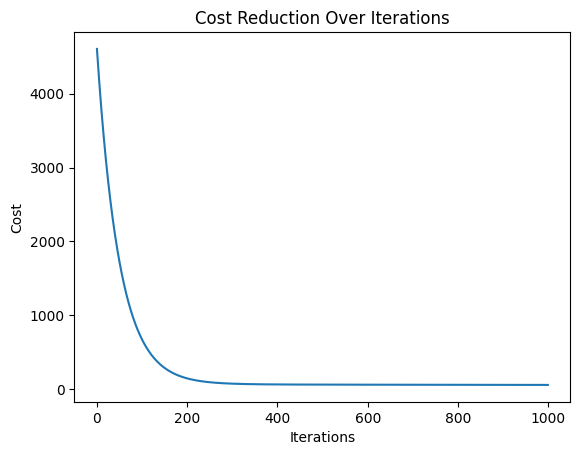

In [9]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
num_iters = 1000

theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.show()

In [10]:
#  Predicting quality ratings for test data
predictions = np.dot(X_test, theta)

# Saving predictions to CSV
test_data['Predicted Quality Rating'] = predictions
test_data.to_csv('juniors_qualityrating_asavari.csv', index=False)

print("Predictions saved to 'juniors_qualityrating_asavari.csv'")

Predictions saved to 'juniors_qualityrating_asavari.csv'
